# Google Drive Connection
    구글 드라이브와 연결해서 편하게 데이터를 불러오고 저장할 수 있다.
    오른쪽에 폴더 모양의 아이콘을 누르고 드라이브 마운트 하기 버튼을 눌러서 마운트를 진행하면 된다.

# Image Data Processing Library
* OpenCV2
* PIL

In [ ]:
# Hyper Parameters
image_path = "/content/drive/MyDrive/Co-Deep Learning/캠밸스푸.jpg"

# Common Library
import matplotlib.pyplot as plt # matplotlib
import numpy as np # numpy import
import os # path management
from glob import glob # file management as linux

## Data Load From All Directory
    os를 사용해도 되고, linux명령어에 익숙하다면 glob를 사용해도 좋다.

In [ ]:
BASE_URL = "/content/sample_data"
os.listdir(BASE_URL) # 보통은 이렇게 불러와서 BASE_URL과 결합하여 사용한다.

['anscombe.json',
 'README.md',
 'california_housing_train.csv',
 'mnist_test.csv',
 'mnist_train_small.csv',
 'california_housing_test.csv']

In [ ]:
glob(f"{BASE_URL}/*")

['/content/sample_data/anscombe.json',
 '/content/sample_data/README.md',
 '/content/sample_data/california_housing_train.csv',
 '/content/sample_data/mnist_test.csv',
 '/content/sample_data/mnist_train_small.csv',
 '/content/sample_data/california_housing_test.csv']

## Library for Data Load

### PIL에서 Image 모듈을 불러와서 사용한다.
    PIL의 경우 Image Object로 불러와지기 때문에, 딥러닝 사용시 넘파이로 변경을 해야한다.

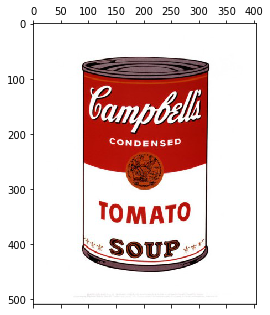

In [ ]:
from PIL import Image
image_pil = Image.open(image_path)
plt.matshow(np.array(image_pil))

In [ ]:
type(image_pil)

PIL.JpegImagePlugin.JpegImageFile

### CV2를 사용하여 이미지를 불러오기
    CV2를 사용하면 이미지의 순서가 RGB가 아닌 BRG로 불러와지기 때문에, PIL과 CV2를 혼용해서 사용할 경우, 주의를 요한다.

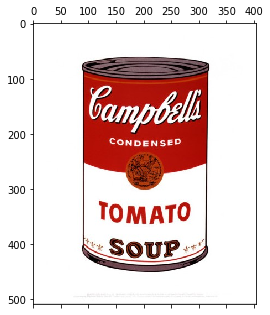

In [ ]:
import cv2
image_cv = cv2.imread(image_path) # imread (RGB 순서가 아니라 BRG 순서로 넘파이를 불러온다.)
image_cv = cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB) # cv2에서 BRG를 RGB순서로 변경한다.
plt.matshow(image_cv)

## Data Processing

In [ ]:
np.array(image_pil).shape

(510, 405, 3)

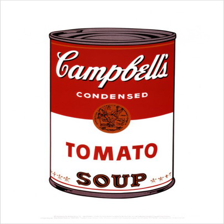

In [ ]:
# 224 x 224 의 크기로 리사이징 해보기
image_pil.resize([224,224])

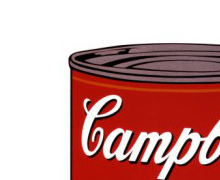

In [ ]:
x_range = (20, 240)
y_range = (20, 200)
image_pil.crop([x_range[0], y_range[0], x_range[1], y_range[1]])

In [ ]:
image_pil.save("./cambel.png")

## Augmentation Methods

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator as ImgGen

In [ ]:
# Train Data 생성시에는 여러가지 Augmentation 기법을 적용하여 훈련함
train_datagen = ImgGen(
    rescale=1./255, 
    horizontal_flip=True, 
    rotation_range=15, 
    width_shift_range=0.1, 
    height_shift_range=0.1, 
    fill_mode='nearest'
)

# Test시에는 절대로 Augmentation을 사용하지 않고 원본 그대로의 이미지를 사용해야힘
test_datagen = ImgGen(rescale=1./255)

In [ ]:
np.array([np.array(image_pil), np.array(image_pil), np.array(image_pil)]).shape

(3, 510, 405, 3)

In [ ]:
train_iter = train_datagen.flow(X_train,y_train, shuffle=True)

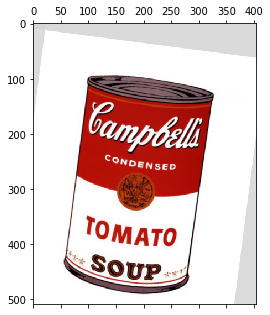

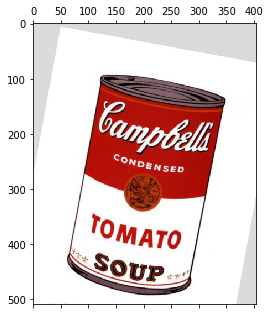

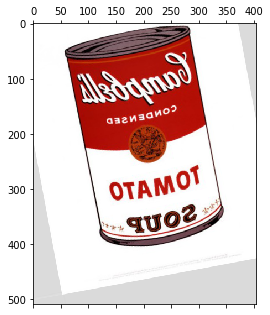

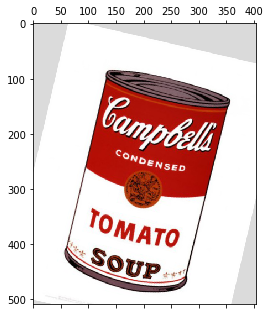

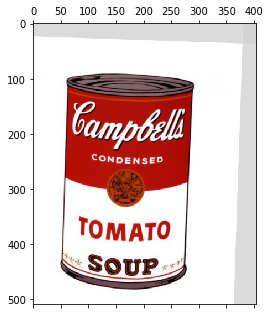

In [ ]:
for _ in range(5):
    plt.matshow(train_iter[0][0])
    plt.show()


\


In [ ]:
model.fit(train_iter)